# **Tim Based Model AI**
**Supervior** 
 1. Ibu Amalya Citra
 
**Asisten**
 1. Alfianri Manihuruk
 2. Annesa Azizi


In [47]:
#library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skfuzzy as fuzz
import pandas as pd

In [75]:
df= pd.read_excel("data_set.xlsx", sheet_name="Use")
df.head()

,TOTAL,MEAN,RANGKING,SELISIH_SEM
0,6664,86.545455,18,2.875000
1,6676,86.701299,16,2.583333
2,6625,86.038961,23,2.583333
3,6596,85.662338,28,3.458333
4,6711,87.155844,11,3.458333


In [114]:
#1. fuzzification
def rangesub (low, high, step):
    subjektif = np.arange(low, high, step)
    return subjektif

def Algoritmafuz(rule, range_sub, title):
    lo = fuzz.trapmf(range_sub, rule[0])
    mi = fuzz.trapmf(range_sub, rule[1])
    hi = fuzz.trapmf(range_sub, rule[2])
    
    fig, ax =plt.subplots(nrows=1, figsize=(7,3))
    ax.plot(range_sub, lo, 'b', linewidth = 1.5, label= 'cukup')
    ax.plot(range_sub, mi, 'g', linewidth = 1.5, label= 'baik')
    ax.plot(range_sub, hi, 'r', linewidth = 1.5, label= 'sangat baik')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, mi, hi

def Algoritmafuz2(rule, range_sub, title):
    lo = fuzz.trapmf(range_sub, rule[0])
    hi = fuzz.trapmf(range_sub, rule[1])
   
    fig, ax =plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(range_sub, lo, 'y', linewidth = 1.5, label= 'cukup')
    ax.plot(range_sub, hi, 'b', linewidth = 1.5, label= 'baik')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, hi

def Algoritmafuz3(rule, range_sub, title):
    lo = fuzz.trapmf(range_sub, rule[0])
    mi = fuzz.trapmf(range_sub, rule[1])
    hi = fuzz.trapmf(range_sub, rule[2])
    
    fig, ax =plt.subplots(nrows=1, figsize=(7,3))
    ax.plot(range_sub, lo, 'b', linewidth = 1.5, label= 'sangat baik')
    ax.plot(range_sub, mi, 'g', linewidth = 1.5, label= 'baik')
    ax.plot(range_sub, hi, 'r', linewidth = 1.5, label= 'cukup')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, mi, hi

## Fungsi Status keanggotaan

In [115]:
## Fungsi Keanggotaan
#1. total nilai keseluruhan
xnilai_total = rangesub(6000, 8500, 1)
rnilai_total = np.array([
    [6000, 6200, 6523, 6600],
    [6523, 6647, 6770.48, 6800],
    [6770.48, 7000, 8200, 8500]  
])

#2. rangking total nilai keseluruhan
xranking = rangesub(1, 170, 1)
rranking = np.array([
    [1, 10, 20, 25],
    [15, 30, 50, 75],
    [50, 100, 150, 170]
])

#3. rata-rata nilai keseluruhan
xmean = rangesub(60, 100, 1)
rmean = np.array([
    [60, 75, 80, 85],
    [80, 85, 90, 100]
])

#4. selisih nilai persemester
xsel = rangesub(-5, 10, 0.1)
rsel = np.array([
    [-5, -2, 1, 5],
    [4, 7, 9, 10]
])

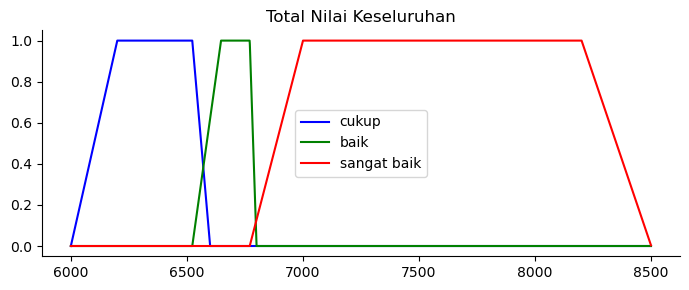

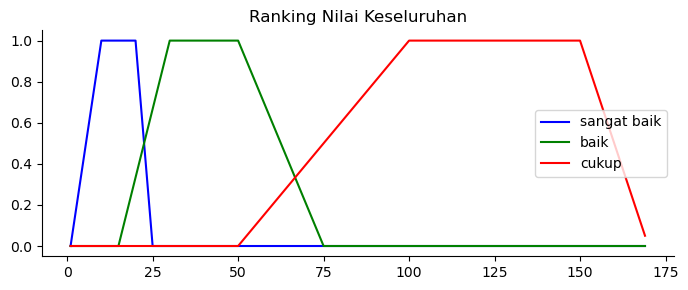

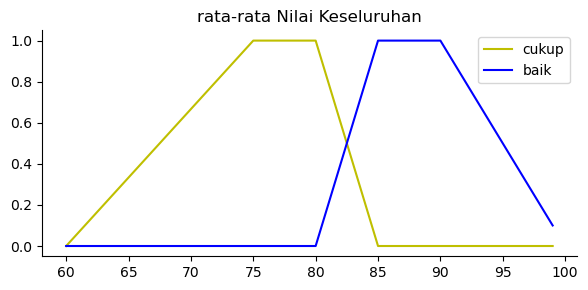

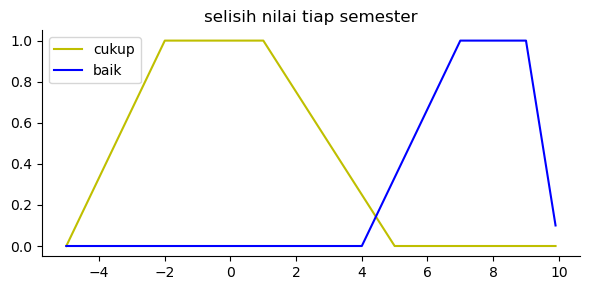

In [116]:
lo_nilai, mi_nilai, hi_nilai = Algoritmafuz(rnilai_total, xnilai_total, 'Total Nilai Keseluruhan')
lo_ranking, mi_ranking, hi_ranking = Algoritmafuz3(rranking, xranking, 'Ranking Nilai Keseluruhan')
lo_mean, hi_mean = Algoritmafuz2(rmean, xmean, 'rata-rata Nilai Keseluruhan')
lo_sel, hi_sel = Algoritmafuz2(rsel, xsel, 'selisih nilai tiap semester')

## Fungsi keanggotaan

In [118]:
def FungKeanggotaan (range_sub, lo, mi, hi, nilai):
    lo = fuzz.interp_membership(range_sub, lo, nilai)
    mi = fuzz.interp_membership(range_sub, mi, nilai)  
    hi = fuzz.interp_membership(range_sub, hi, nilai) 

    return lo, mi, hi

def FungKeanggotaan2 (range_sub, lo, hi, nilai):
    lo = fuzz.interp_membership(range_sub, lo, nilai) 
    hi = fuzz.interp_membership(range_sub, hi, nilai) 

    return lo, hi

## Fungsi Status keanggotaan

In [119]:
def Status(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1] and keanggotaan[0] > keanggotaan[2]:
        status = "cukup"
    elif keanggotaan[1] > keanggotaan[0] and keanggotaan[1] > keanggotaan[2]:
        status = "baik"
    elif keanggotaan[2] > keanggotaan[0] and keanggotaan[2] > keanggotaan[1]:
        status = "sangat baik"

    return status

def Status2(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1]:
        status = "cukup"
    elif keanggotaan[1] > keanggotaan[0]:
        status = "baik"
    return status

def Status3(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1] and keanggotaan[0] > keanggotaan[2]:
        status = "sangat baik"
    elif keanggotaan[1] > keanggotaan[0] and keanggotaan[1] > keanggotaan[2]:
        status = "baik"
    elif keanggotaan[2] > keanggotaan[0] and keanggotaan[2] > keanggotaan[1]:
        status = "cukup"

    return status

### 1. fungsi keanggotan nilai total 

In [71]:
#1. keanggotan nilai total keseluruhan
nil_tot = df["TOTAL"]
nilai_total= FungKeanggotaan(xnilai_total, lo_nilai, mi_nilai, hi_nilai, nil_tot)
print("nilai total keselurahan mapel :", nilai_total)

nilai total keselurahan mapel : (array([0.        , 0.        , 0.        , 0.05194805, 0.        ,
       0.28571429, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.85714286, 0.        , 0.        , 0.71428571, 1.        ,
       0.        , 0.94805195, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        

### 2. fungsi keanggotan nilai ranking

In [77]:
rank_nil = df["RANGKING"]
rank_nilai = FungKeanggotaan(xranking, lo_ranking, mi_ranking, hi_ranking, rank_nil)
print("ranking nilai : ", rank_nilai)

ranking nilai :  (array([1.        , 1.        , 0.4       , 0.        , 1.        ,
       0.        , 0.6       , 1.        , 0.88888889, 0.77777778,
       0.8       , 1.        , 0.66666667, 0.33333333, 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.22222222, 0.        , 0.        , 1.        , 0.66666667,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.22222222, 0.6       ,
       1.        , 0.77777778, 1.        , 0.11111111, 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0

### 3. fungsi keanggotan nilai rata-rata 

In [78]:
mean_nil = df["MEAN"]
mean_nilai = FungKeanggotaan2(xmean, lo_mean, hi_mean, mean_nil)
print("rata-rata nilai : ", mean_nilai)

rata-rata nilai :  (array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02857143, 0.        , 0.        , 0.        , 0.05714286,
       0.        , 0.04675325, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ,

### 4. fungsi keanggotan selisih nilai persemester

In [127]:
type(sel_nil)

pandas.core.series.Series

In [82]:
sel_nil = df["SELISIH_SEM"]
nilai_sel = FungKeanggotaan2(xsel, lo_sel, hi_sel, sel_nil)
print("selisih nilai persemester : ", nilai_sel)

selisih nilai persemester :  (array([0.53125   , 0.60416667, 0.60416667, 0.38541667, 0.38541667,
       0.60416667, 0.60416667, 0.55208333, 0.55208333, 0.51041667,
       0.51041667, 0.52083333, 0.52083333, 0.60416667, 0.60416667,
       0.66666667, 0.66666667, 0.66666667, 0.60416667, 0.60416667,
       0.60416667, 0.60416667, 0.65625   , 0.51041667, 0.51041667,
       0.55208333, 0.55208333, 0.625     , 0.47916667, 0.47916667,
       0.61458333, 0.61458333, 0.61458333, 0.65625   , 0.65625   ,
       0.39583333, 0.5625    , 0.5625    , 0.625     , 0.60416667,
       0.55208333, 0.55208333, 0.47916667, 0.70833333, 0.59375   ,
       0.59375   , 0.78125   , 0.64583333, 0.72916667, 0.70833333,
       0.70833333, 0.64583333, 0.63541667, 0.63541667, 0.72916667,
       0.64583333, 0.64583333, 0.65625   , 0.71875   , 0.73958333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1

## Hasil Keanggotaan

In [113]:
# nilai keseluruhan mata pelajran
hasil_nilai_total   = Status(nilai_total)
# hasil_nilai_rank    = Status3(rank_nilai)
# hasil_nilai_mean    = Status2(mean_nilai)
# hasil_nilai_selisih = Status2(nilai_sel)

# print("ranking nilai siswa        :", hasil_nilai_rank)
# print("nilai total siswa          :", hasil_nilai_total)
# print("rata-rata nilai nilai      :", hasil_nilai_mean)
# print("selisih nilai persemester  :", hasil_nilai_selisih)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [105]:
dataku= list(nilai_total)
dataku
type(dataku)

list

## Fuzzy Rule Base

1. nilai total (cukup, baik, sangat baik)
2. ranking nilai (cukup, baik, sangat baik)
3. rata-rata (cukup, baik)
4. selisih nilai (baik, cukup)

In [25]:
def rulebase(total, ranking, mean, selisih):
    
    siswa = ""
    
    # bagian 1
    if total == 'cukup' and ranking == 'cukup' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di tolak'
    elif total == 'cukup' and ranking == 'cukup' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di tolak'
    elif total == 'cukup' and ranking == 'cukup' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di tolak'
    elif total == 'cukup' and ranking == 'cukup' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'  
        
    elif total == 'cukup' and ranking == 'baik' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di tolak'
    elif total == 'cukup' and ranking == 'cukup' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di tolak'
    elif total == 'cukup' and ranking == 'baik' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di pertimbangkan'
    elif total == 'cukup' and ranking == 'baik' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'
        
    elif total == 'cukup' and ranking == 'sangat baik' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di tolak'
    elif total == 'cukup' and ranking == 'sangat baik' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'
    elif total == 'cukup' and ranking == 'sangat baik' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di tolak'   
    elif total == 'cukup' and ranking == 'sangat baik' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di terima'
            
    # bagian 2
    if total == 'baik' and ranking == 'cukup' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di tolak'
    elif total == 'baik' and ranking == 'cukup' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'
    elif total == 'baik' and ranking == 'cukup' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di pertimbangkan'
    elif total == 'baik' and ranking == 'cukup' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di terima'  
        
    elif total == 'baik' and ranking == 'baik' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di pertimbangkan'
    elif total == 'baik' and ranking == 'cukup' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'
    elif total == 'baik' and ranking == 'baik' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di terima'
    elif total == 'baik' and ranking == 'baik' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di terima'
        
    elif total == 'baik' and ranking == 'sangat baik' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di pertimbangkan'
    elif total == 'baik' and ranking == 'sangat baik' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di terima'
    elif total == 'baik' and ranking == 'sangat baik' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di tolak'   
    elif total == 'baik' and ranking == 'sangat baik' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di tolak'
          
  
    # bagian 3
    elif total == 'sangat baik' and ranking == 'cukup' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di tolak'
    elif total == 'sangat baik' and ranking == 'cukup' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di tolak'
    elif total == 'sangat baik' and ranking == 'cukup' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di tolak'
    elif total == 'sangat baik' and ranking == 'cukup' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'  
        
    elif total == 'sangat baik' and ranking == 'baik' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di pertimbangkan'
    elif total == 'sangat baik' and ranking == 'cukup' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'
    elif total == 'sangat baik' and ranking == 'baik' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di terima'
    elif total == 'sangat baik' and ranking == 'baik' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di terima'
        
    elif total == 'sangat baik' and ranking == 'sangat baik' and mean == 'cukup' and selisih == 'cukup':
        siswa = 'siswa di terima'
    elif total == 'sangat baik' and ranking == 'sangat baik' and mean == 'cukup' and selisih == 'baik':
        siswa = 'siswa di pertimbangkan'
    elif total == 'sangat baik' and ranking == 'sangat baik' and mean == 'baik' and selisih == 'cukup':
        siswa = 'siswa di terima'   
    elif total == 'sangat baik' and ranking == 'sangat baik' and mean == 'baik' and selisih == 'baik':
        siswa = 'siswa di terima'
         
            
    return siswa
  

# Hasil Akhir 

In [26]:
rulebase(hasil_nilai_total, hasil_nilai_rank, hasil_nilai_mean, hasil_nilai_selisih)

'siswa di tolak'

In [2]:
print("alfianri manihuruk")

alfianri manihuruk
